# **Finding How The Data Is Distributed**


## Objectives
- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [ ]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
#data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
file_path = 'survey_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
pd.option_context('display.max_columns', None)
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    object 
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [6]:
with pd.option_context('display.max_rows', None):
    print(df.isna().sum())

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmired                   14565


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [8]:
a = ['Employment', 'JobSat', 'YearsCodePro']
for i in a:
    print(i)
    print(df[i].isna().sum(),"/",df.shape[0])

Employment
0 / 65437
JobSat
36311 / 65437
YearsCodePro
13827 / 65437


C:\Users\alvia\AppData\Local\Temp\ipykernel_26080\827177444.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


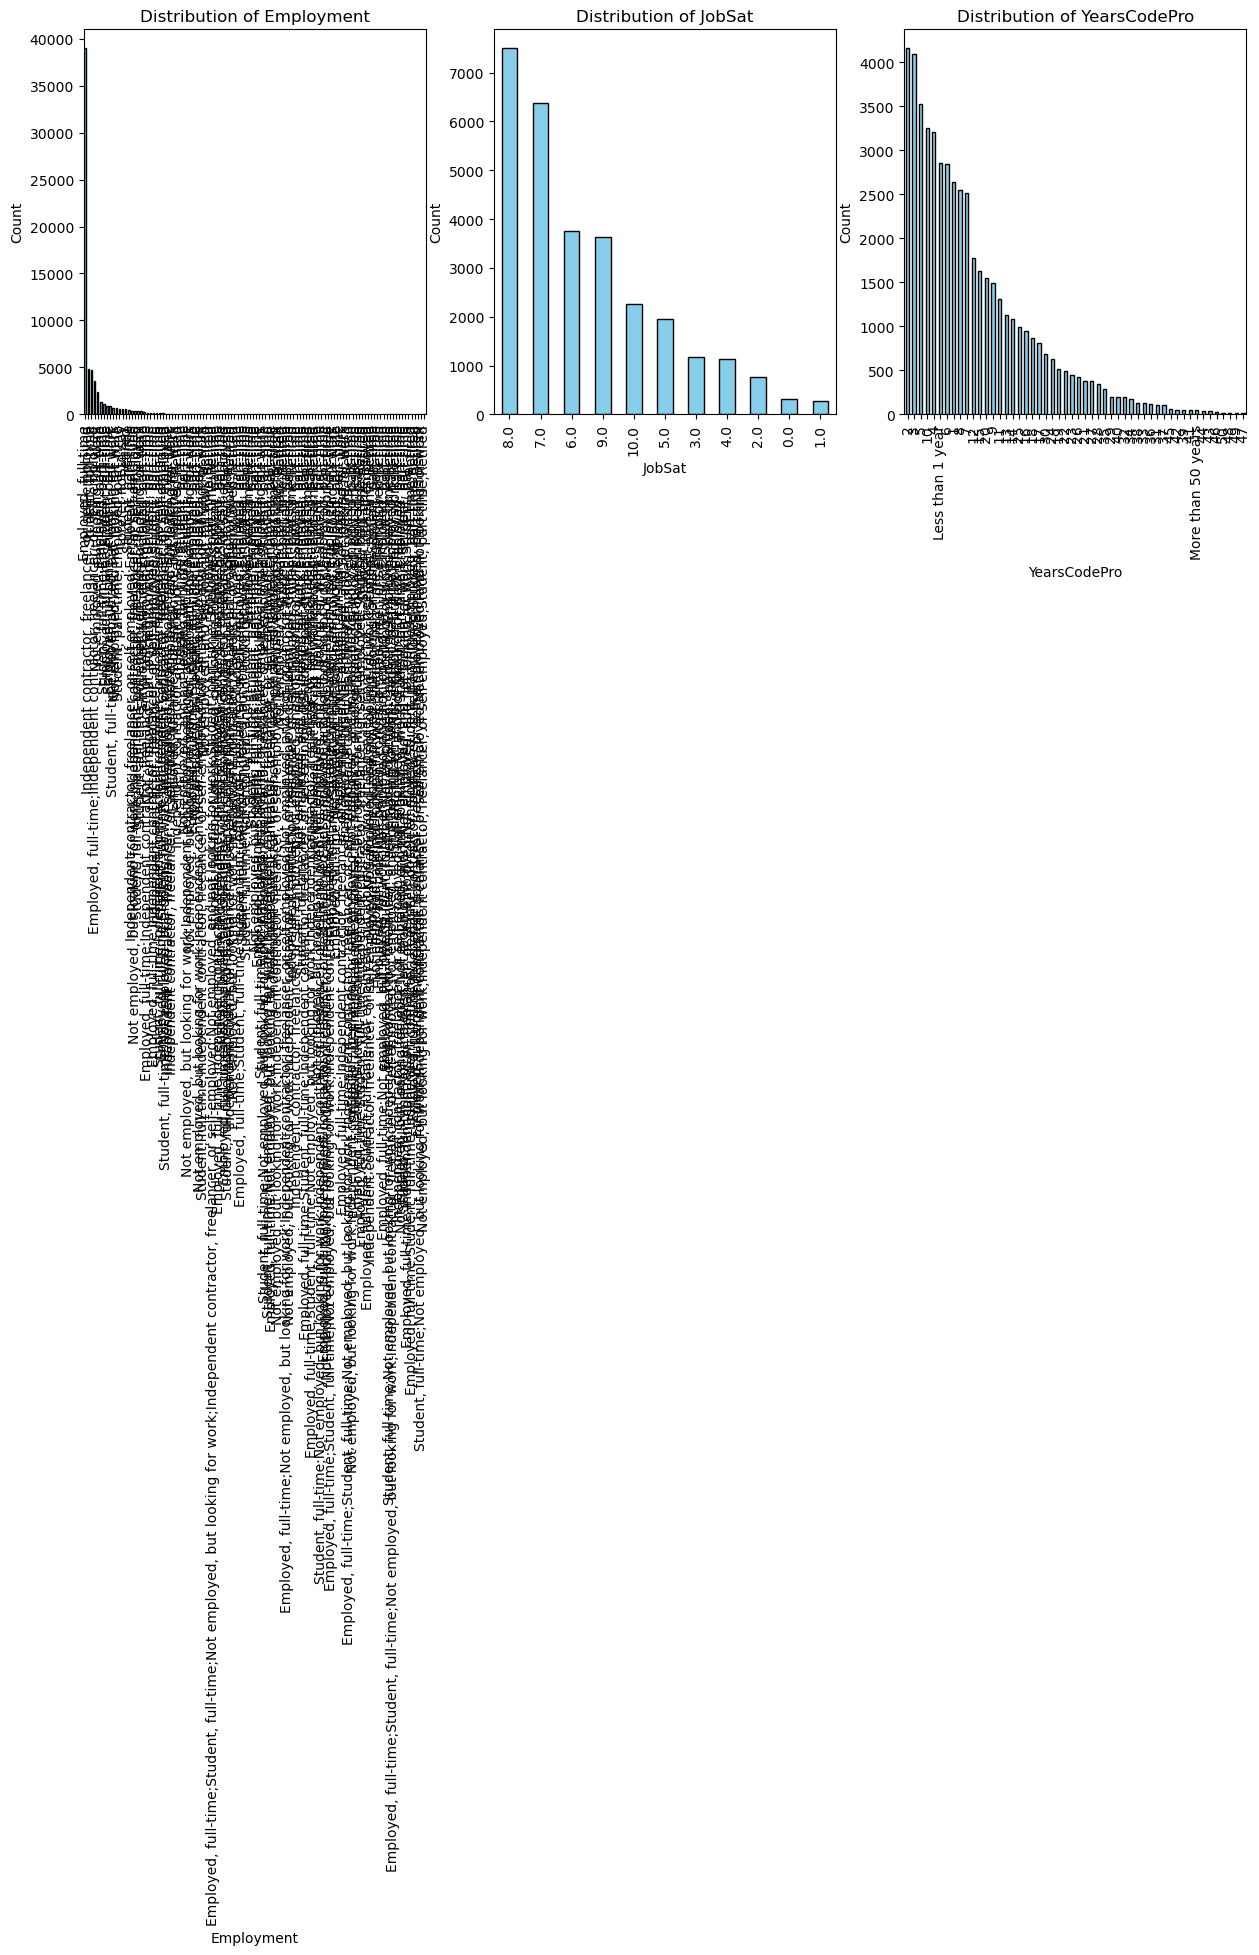

In [13]:
fig, axes = plt.subplots(1, len(a), figsize=(15, 5))

# Loop through each column and plot a histogram
for i, col in enumerate(a):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

# Show plot
plt.tight_layout()
plt.show()

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


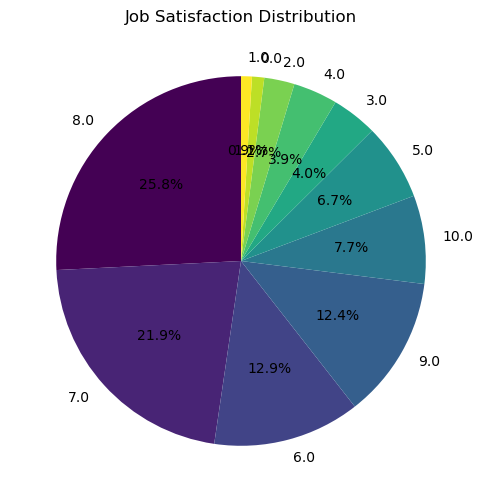

In [14]:
plt.figure(figsize=(8, 6))
df['JobSat'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.ylabel('')  # Remove y-label for cleaner look
plt.title('Job Satisfaction Distribution')
plt.show()


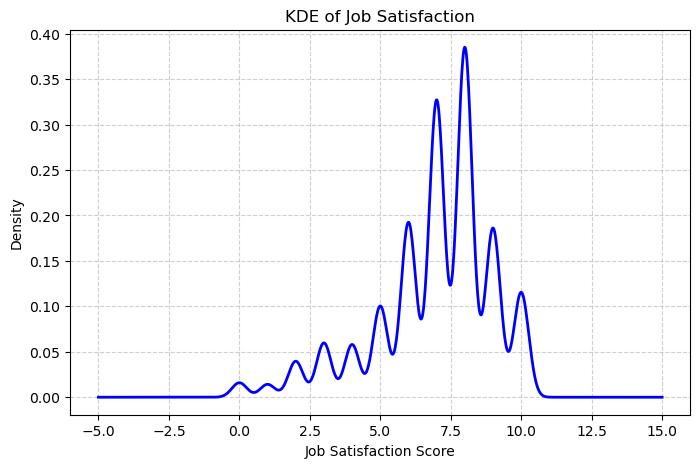

In [ ]:
plt.figure(figsize=(8, 5))
df['JobSat'].dropna().plot(kind='kde', color='blue', linewidth=2)
plt.xlabel('Job Satisfaction Score')
plt.title('KDE of Job Satisfaction')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [17]:
#pip install matplotlib-venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45396 sha256=1f20be6e60cced536398007c3b78e2a5a589953abe378905cc69fe53ee2f60db
  Stored in directory: c:\users\alvia\appdata\local\pip\cache\wheels\8a\29\52\4d90d9556445079f88255b87a75d951357eff52d0795b88f4f
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


<Figure size 1200x600 with 0 Axes>

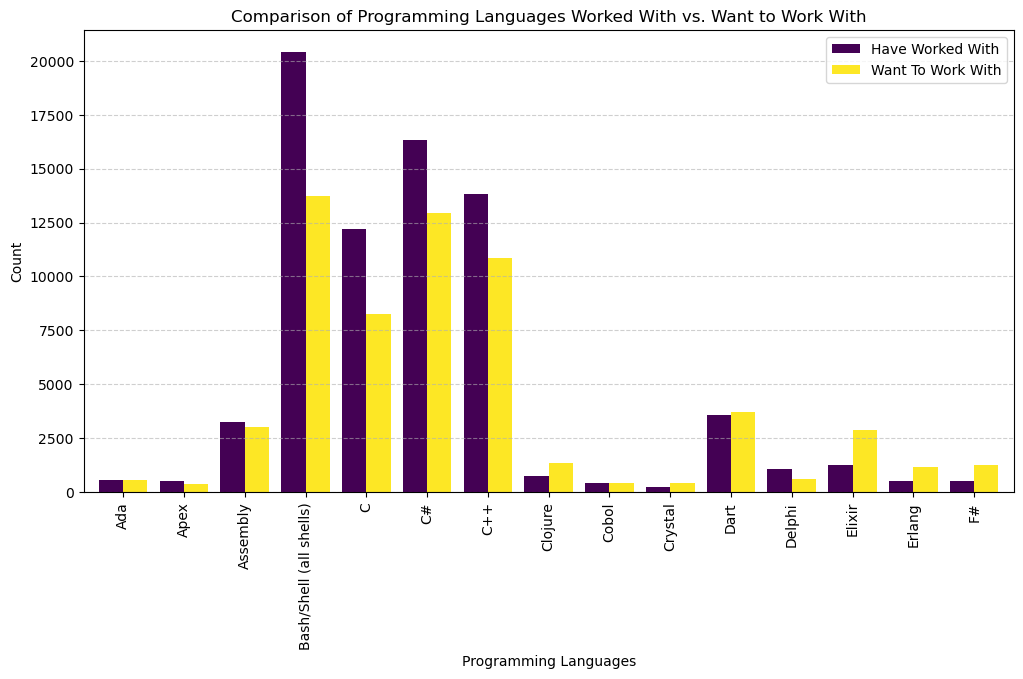

In [30]:
import seaborn as sns
import pandas as pd

# Count occurrences of each language
worked_counts = df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts()
wanted_counts = df['LanguageWantToWorkWith'].str.split(';').explode().value_counts()

# Combine into a DataFrame
lang_comparison = pd.DataFrame({'Have Worked With': worked_counts, 'Want To Work With': wanted_counts}).fillna(0)
lang_comparison = lang_comparison.head(15)  # Take top 15 languages

# Plot
plt.figure(figsize=(12, 6))
lang_comparison.plot(kind='bar', width=0.8, figsize=(12,6), colormap='viridis')
plt.xlabel("Programming Languages")
plt.ylabel("Count")
plt.title("Comparison of Programming Languages Worked With vs. Want to Work With")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


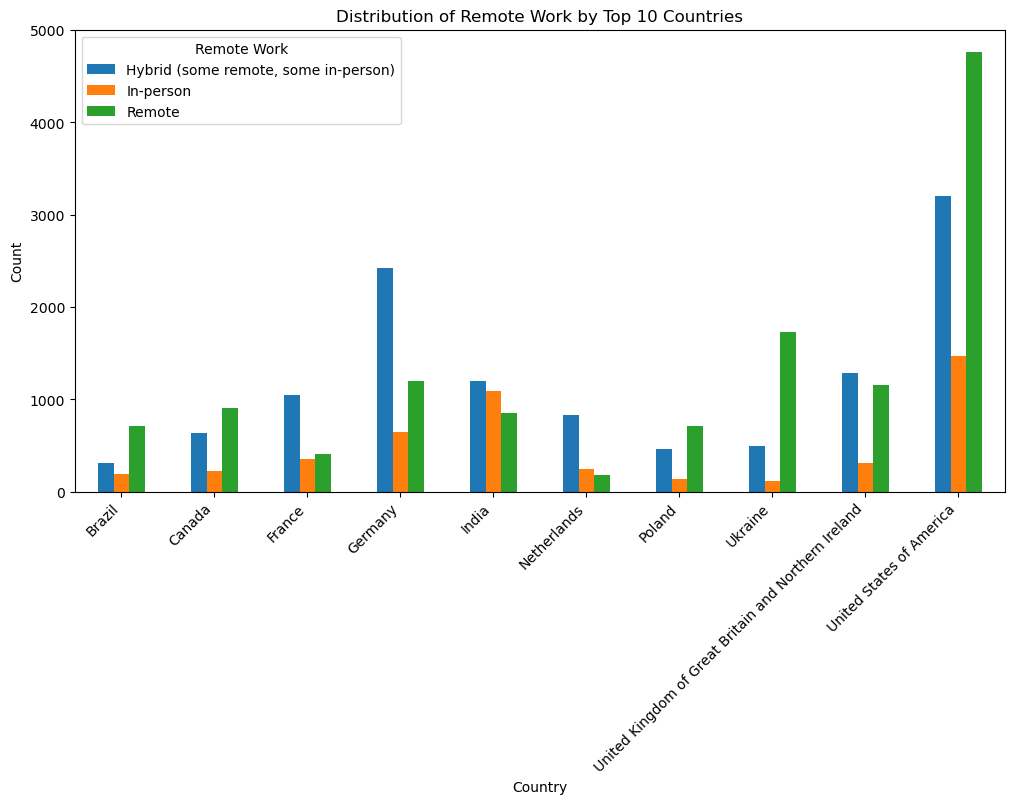

In [41]:
# Get the top 10 countries by count
top_countries = df['Country'].value_counts().head(10).index

# Filter dataset
df_top = df[df['Country'].isin(top_countries)]

# Count occurrences of RemoteWork by region
remote_region_counts = df_top.groupby(['Country', 'RemoteWork']).size().unstack()

# Plot grouped bar chart
remote_region_counts.plot(kind='bar', stacked=False, figsize=(12, 6))

# Formatting
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Distribution of Remote Work by Top 10 Countries")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Remote Work")
plt.show()


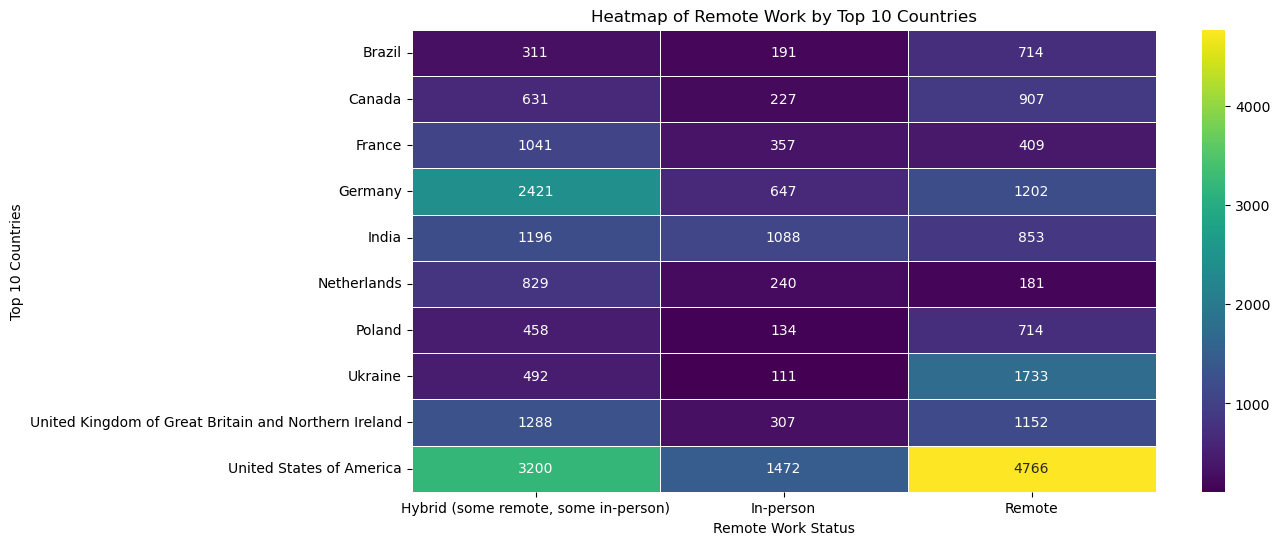

In [39]:
# Create a pivot table for heatmap
heatmap_data = df_top.pivot_table(index='Country', columns='RemoteWork', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt="d", linewidths=0.5)

# Formatting
plt.xlabel("Remote Work Status")
plt.ylabel("Top 10 Countries")
plt.title("Heatmap of Remote Work by Top 10 Countries")
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [57]:
df_cleaned = df[['YearsCodePro', 'JobSat']].dropna()

In [59]:
from scipy.stats import pearsonr

pearson_corr, p_value_pearson = pearsonr(df_cleaned['YearsCodePro'], df_cleaned['JobSat'])
print(f"Pearson Correlation: {pearson_corr:.4f}, P-value: {p_value_pearson:.4f}")

Pearson Correlation: 0.1034, P-value: 0.0000


In [60]:
from scipy.stats import spearmanr

spearman_corr, p_value_spearman = spearmanr(df_cleaned['YearsCodePro'], df_cleaned['JobSat'])
print(f"Spearman Correlation: {spearman_corr:.4f}, P-value: {p_value_spearman:.4f}")


Spearman Correlation: 0.1207, P-value: 0.0000


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [46]:
cross_tab = pd.crosstab(df['Employment'], df['EdLevel'], margins=True)
cross_tab.head()

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else,All
Employment,,,,,,,,,
"Employed, full-time",1059,16806,11011,160,2073,1460,3579,377,36525
"Employed, full-time;Employed, part-time",9,90,61,1,8,9,15,3,196
"Employed, full-time;Independent contractor, freelancer, or self-employed",104,1381,963,25,159,181,492,41,3346
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",11,79,45,1,10,6,14,2,168
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0,0,0,0,1,0,0,0,1


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
